# Markov Chain By Examples

[Edward Lu](https://github.com/edwardlu71/notebooks)

[__Markov chain__](https://en.wikipedia.org/wiki/Markov_chain): a stochastic model describing a sequence of possible events in which the probability of each event _depends only_ on the state attained in the previous event. <br>
__Markov processes__: the same concept by in continuous time. <br>
[__Markov matrix__](https://en.wikipedia.org/wiki/Stochastic_matrix): a square matrix used to describe the transitions of a Markov chain <br>
__Transitions__:    The changes of state of the system are called transitions<br>
__Stationary Distributions__: a probability distribution that remains unchanged in the Markov chain as time progresses

## Population Problem

In the first year, the populations in city and in countryside are at percentage of 20% and 80%. Every year 5% of city residents move to countryside, and 10% of people move from countryside to city. Please give the distribution of the population on Nth year.

In [1]:
from sympy import *

In [2]:
P = Matrix([[0.95, 0.05],[0.1, 0.9]]); P

Matrix([
[0.95, 0.05],
[ 0.1,  0.9]])

In [3]:
first_year = Matrix([0.2, 0.8]).T; first_year

Matrix([[0.2, 0.8]])

In [4]:
year_2 = first_year @ P; year_2

Matrix([[0.27, 0.73]])

In [5]:
year_10 = first_year @ P**(10-1); year_10

Matrix([[0.558578758401172, 0.441421241598828]])

In [6]:
year_100 = first_year @ P**(100-1); year_100  # Stationary Distribution

Matrix([[0.666666618640222, 0.333333381359776]])

## Google Page Ranking
[__PageRank__](https://en.wikipedia.org/wiki/PageRank) is an algorithm used by Google Search to rank web pages. This example explained the mechanism how it works <br>

I dynamically create 

* **n** node graph to simulate the web pages
* the random number of directed edges to simulate the links from one page to others <br>

I also assume that the links on each page have equal chance to be clicked.

In [7]:
%matplotlib inline
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import itertools
from IPython.display import display
init_printing()

In [8]:
n = 5              # simulate N pages
adj = 0            # adjustment
pages = range(n)   # use number to label pages 0..N-1

# these are for the simulation of the possible links. 
permutations_from_to = list(itertools.permutations(pages, 2))
number_of_permutations = len(permutations_from_to)
pairing_percent = 70/100    # randomly generate % of bidirect (from, to) pairs
number_of_pairs = round(number_of_permutations * pairing_percent)

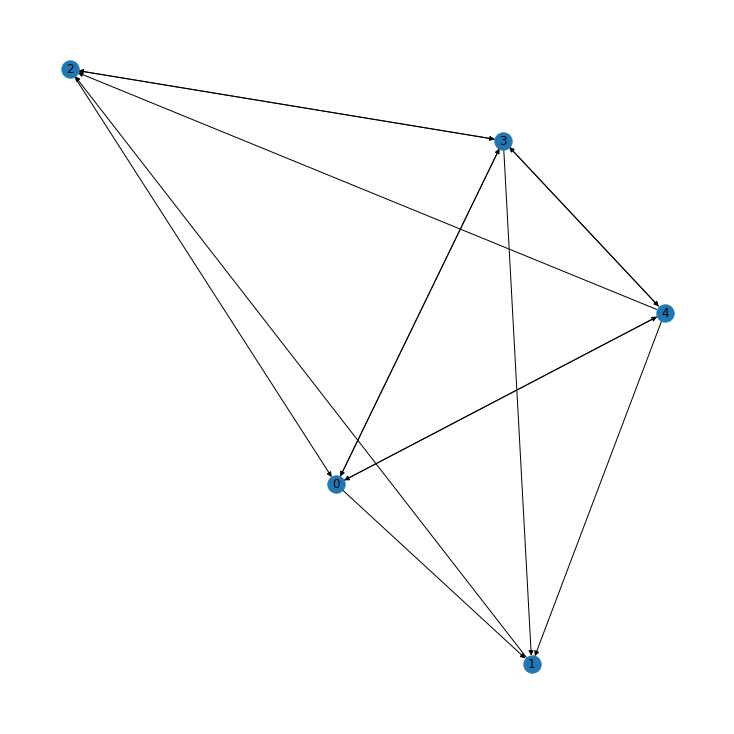

In [9]:
# create a graph with each page as a node and random edges to simulate the links
G = nx.MultiDiGraph()
G.add_nodes_from(pages)    # generate a graph with
samples = random.sample(permutations_from_to, k=number_of_pairs)  # pick samples from all possible permutations
G.add_edges_from(samples)
plt.rcParams["figure.figsize"] = (10,10)
nx.draw(G, pos=nx.spring_layout(G), with_labels=True)
plt.show()

In [10]:
# count how many linkes on a page
weights = [sum(1 for _ in G.neighbors(i)) for i in pages]; weights

In [11]:
# create Markov transition matrix
m = np.zeros((n, n))
for i in G.nodes():
    for j in G.neighbors(i):
        m[i][j] = 1/weights[i]
m_adj = m * (1-adj) + np.full((n,n), 1/n) * adj
M = Matrix(m_adj); display(M)

⎡0.0   0.333333333333333  0.0   0.333333333333333  0.333333333333333⎤
⎢                                                                   ⎥
⎢0.0          0.0         1.0          0.0                0.0       ⎥
⎢                                                                   ⎥
⎢0.5          0.0         0.0          0.5                0.0       ⎥
⎢                                                                   ⎥
⎢0.25        0.25         0.25         0.0               0.25       ⎥
⎢                                                                   ⎥
⎣0.25        0.25         0.25        0.25                0.0       ⎦

### Matrix M
M is the Markov matrix for the transition to simulate the stochastic process a user randomly browsing from one page to another following the links. Here we assume that each link in the page has same chance to be clicked <br>
Be aware the google formula introduced a dumping factor, the meaning you can find in wiki link. In this simple example I set it to zero (adj=0). According to Google's research damping factor is usually set to 0.85<br>
Dot product the matrix multiple times to find the so-called Stationary Distributions

In [12]:
A = M**20; A

⎡ 0.2181752489952   0.163642587792389  0.254546489638687  0.232721102696163  0
⎢                                                                             
⎢0.218186691278135  0.163626251082765  0.254561172918756  0.232730158826884  0
⎢                                                                             
⎢0.218187057639464  0.163635368272798  0.254532722262851  0.232733415025454  0
⎢                                                                             
⎢0.218179899180094  0.163637876546364  0.254546672819352  0.232725376392713  0
⎢                                                                             
⎣0.218179899180094  0.163637876546364  0.254546672819352  0.232725376391804  0

.13091457087756 ⎤
                ⎥
.13089572589346 ⎥
                ⎥
.130911436799433⎥
                ⎥
.130910175061477⎥
                ⎥
.130910175062386⎦

In [13]:
ranking = list(A.row(0))
ranking_pages = np.argsort(ranking); display(ranking_pages)   # sorted from low to high, the page id

array([4, 1, 0, 3, 2])